## Problem 1

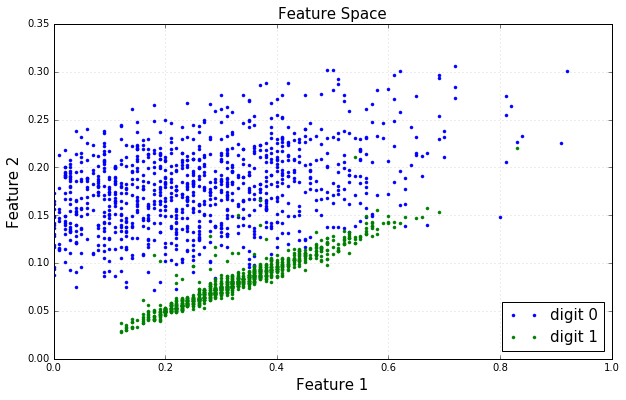

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from six.moves import cPickle
import cvxpy as cvx

data = cPickle.load(open('E:\\unist\\2\\Machine Learning\\data.pkl', 'rb'))

data0 = data['0']
data1 = data['1']

# Convert to binary image
data0 = data0 > 125
data1 = data1 > 125

# Average pixels locaed at the center of the image
feature0_1 = np.sum(data0[:,10:20,10:20], axis=(1, 2)).reshape(-1, 1)/100
feature1_1 = np.sum(data1[:,10:20,10:20], axis=(1, 2)).reshape(-1, 1)/100

# Total average pixels over the entire location
feature0_2 = np.sum(data0, axis=(1, 2)).reshape(-1, 1)/(28*28)
feature1_2 = np.sum(data1, axis=(1, 2)).reshape(-1, 1)/(28*28)

plt.figure(figsize=(10, 6))
plt.title('Feature Space', fontsize=15)
plt.plot(feature0_1, feature0_2, '.', label='digit 0')
plt.plot(feature1_1, feature1_2, '.', label='digit 1')
plt.grid(alpha=0.3)
plt.legend(fontsize=15, loc='lower right')
plt.xlabel('Feature 1', fontsize=15)
plt.ylabel('Feature 2', fontsize=15)
plt.show()

### Step 1. Define variables

In [8]:
X1 = np.hstack([np.ones([feature0_1.shape[0], 1]), feature0_1, feature0_2])
X2 = np.hstack([np.ones([feature1_1.shape[0], 1]), feature1_1, feature1_2])

X1 = np.asmatrix(X1)
X2 = np.asmatrix(X2)

N = X1.shape[0]
M = X2.shape[0]

m = N + M
X = np.vstack([X1, X2])
y = np.vstack([np.ones([N,1]), -np.ones([M,1])])

g = 1
w = cvx.Variable(3,1)
d = cvx.Variable(m,1)
obj = cvx.Minimize(cvx.norm(w,2) + g*(np.ones([1,m])*d))
const = [cvx.mul_elemwise(y, X*w) >= 1-d, d >= 0]

### Step 2. CVXPY
Run CVXPY to find  ω.

In [9]:
prob = cvx.Problem(obj, const).solve()
w = w.value

### Step 3. Plot the result

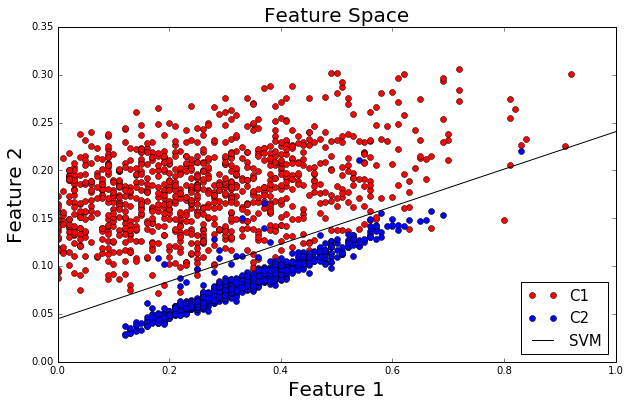

In [10]:
xp = np.linspace(0,max(X1.max(), X2.max()),100).reshape(-1,1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

plt.figure(figsize=(10, 6))
plt.plot(X1[:,1], X1[:,2], 'ro', label='C1')
plt.plot(X2[:,1], X2[:,2], 'bo', label='C2')
plt.plot(xp, yp, 'k', label='SVM')

plt.title('Feature Space', fontsize = 20)
plt.xlabel('Feature 1', fontsize = 20)
plt.ylabel('Feature 2', fontsize = 20)
plt.legend(loc = 4, fontsize = 15)
plt.show()

##  
## Problem 3

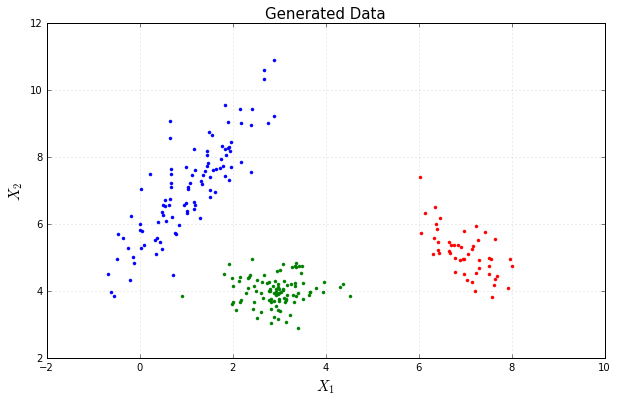

In [30]:
import numpy as np
import matplotlib.pyplot as plt

## generate three simulated clusters

mu1 = np.array([1, 7])
SIGMA1 = 0.8*np.array([[1, 1.5],
                       [1.5, 3]])
X1 = np.random.multivariate_normal(mu1, SIGMA1, 100)

mu2 = np.array([3, 4])
SIGMA2 = 0.3*np.array([[1, 0],
                       [0, 1]])
X2 = np.random.multivariate_normal(mu2, SIGMA2, 100)

mu3 = np.array([7, 5])
SIGMA3 = 0.3*np.array([[1, -1],
                       [-1, 2]])
X3 = np.random.multivariate_normal(mu3, SIGMA3, 50)

plt.figure(figsize=(10, 6))
plt.title('Generated Data', fontsize=15)
plt.plot(X1[:,0], X1[:,1], '.')
plt.plot(X2[:,0], X2[:,1], '.')
plt.plot(X3[:,0], X3[:,1], '.')
plt.xlabel('$X_1$', fontsize=15)
plt.ylabel('$X_2$', fontsize=15)
plt.grid(alpha=0.3)
plt.axis([-2, 10, 2, 12])
plt.show()

Classification with more than two classes  
: I will use 'one vs rest' method

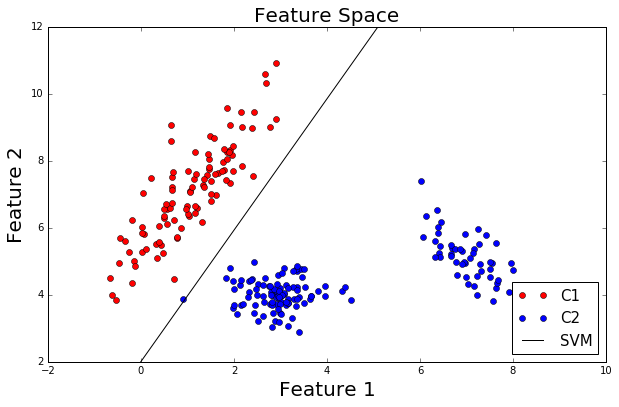

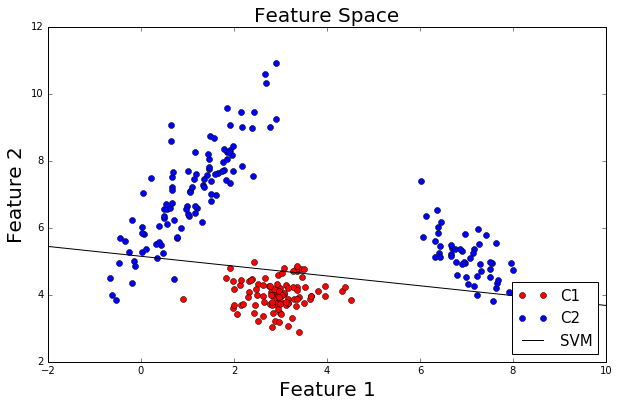

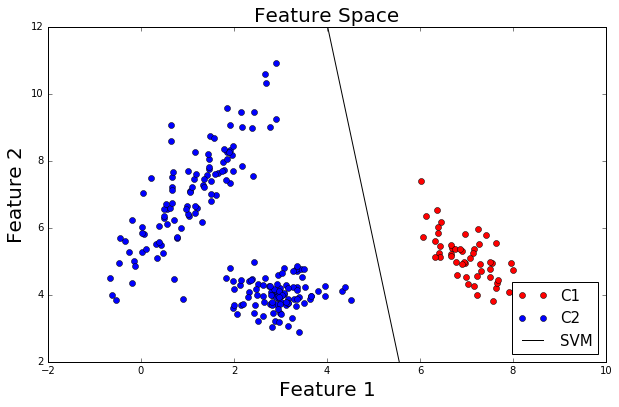

In [31]:
X = np.vstack([X1, X2, X3])
X = np.hstack([np.ones([X.shape[0],1]), X])

cls = [X1, X2, X3]
start = 0
xps, yps, ws = [], [], []

for i, cl in enumerate(cls):
    end = start + len(cl)
    y = - np.ones([X.shape[0], 1])
    y[start:end,:]=1
    
    g = 1
    w = cvx.Variable(X.shape[1],1)

    d = cvx.Variable(X.shape[0],1)
    obj = cvx.Minimize(cvx.norm(w,2) + g*(np.ones([1,X.shape[0]])*d))
    const = [cvx.mul_elemwise(y, X*w) >= 1-d, d >= 0]
    prob = cvx.Problem(obj, const).solve()

    w = w.value
    xp = np.linspace(-2,X.max(),100).reshape(-1,1)
    yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

    plt.figure(figsize=(10, 6))
    plt.xlim(-2, 10)
    plt.ylim(2, 12)
    plt.plot(X[start:end,1], X[start:end,2], 'ro', label='C1')
    plt.plot(np.concatenate([X[end:,1], X[:start,1]]), np.concatenate([X[end:,2], X[:start,2]]), 'bo', label='C2')
    plt.plot(xp, yp, 'k', label='SVM')
    plt.title('Feature Space', fontsize = 20)
    plt.xlabel('Feature 1', fontsize = 20)
    plt.ylabel('Feature 2', fontsize = 20)
    plt.legend(loc = 4, fontsize = 15)
    plt.show()    
    
    ws.append(w)
    yps.append(yp)
    xps.append(xp)
    
    start = end


#####  
(1) Plot classifiers on the original data set

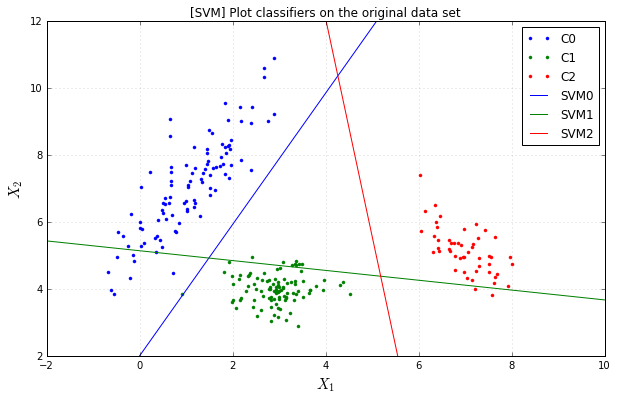

In [32]:
plt.figure(figsize=(10, 6))
plt.title('[SVM] Plot classifiers on the original data set')
plt.plot(X1[:,0], X1[:,1], '.', label='C0')
plt.plot(X2[:,0], X2[:,1], '.', label='C1')
plt.plot(X3[:,0], X3[:,1], '.', label='C2')
plt.xlabel('$X_1$', fontsize=15)
plt.ylabel('$X_2$', fontsize=15)
plt.grid(alpha=0.3)
plt.axis([-2, 10, 2, 12])
color=['b', 'g', 'r']
for i, (xp, yp, c) in enumerate(zip(xps, yps, color)):
    plt.plot(xp, yp, color=c, label='SVM%s'%(i))
plt.legend()
plt.show()

(2) Plot linear classification surfaces and classes that each data belongs to

In [33]:
C0 = X*ws[0]
C1 = X*ws[1]
C2 = X*ws[2]

y=[]
for c0, c1, c2 in zip(C0, C1, C2):
    mx = max(c0, c1, c2)
    if mx==c0:
        y.append(0)
    elif mx==c1:
        y.append(1)
    elif mx==c2:
        y.append(2)
y=np.matrix(y)

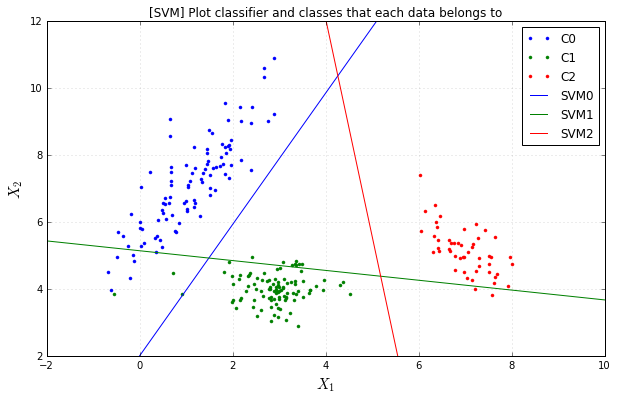

In [34]:
plt.figure(figsize=(10, 6))
b0 = np.where(y==0)
b1 = np.where(y==1)
b2 = np.where(y==2)

plt.title('[SVM] Plot classifier and classes that each data belongs to')
plt.plot(X[b0[1],1], X[b0[1],2], '.', color='b', label='C0')
plt.plot(X[b1[1],1], X[b1[1],2], '.', color='g', label='C1')
plt.plot(X[b2[1],1], X[b2[1],2], '.', color='r', label='C2')
plt.xlabel('$X_1$', fontsize=15)
plt.ylabel('$X_2$', fontsize=15)
plt.grid(alpha=0.3)
plt.axis([-2, 10, 2, 12])
color=['b', 'g', 'r']
for i, (xp, yp, c) in enumerate(zip(xps, yps, color)):
    plt.plot(xp, yp, color=c, label='SVM%s'%(i))
plt.legend()
plt.show()

#  
### Problem 4

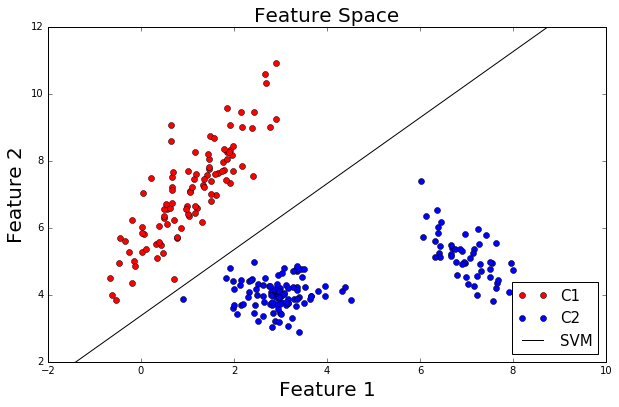

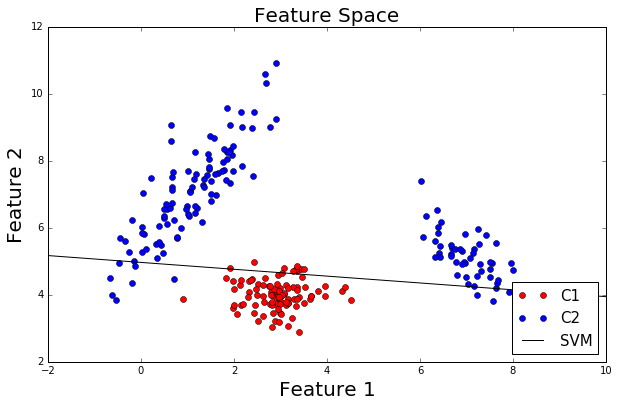

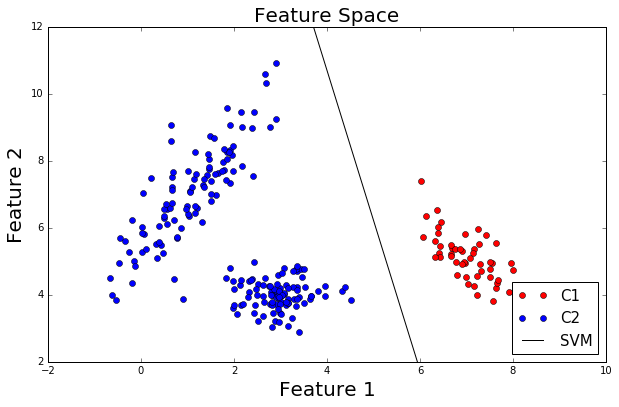

In [35]:
X = np.vstack([X1, X2, X3])
X = np.hstack([np.ones([X.shape[0],1]), X])

cls = [X1, X2, X3]
start = 0
xps, yps, ws = [], [], []

for i, cl in enumerate(cls):
    end = start + len(cl)
    y = np.zeros([X.shape[0], 1])
    y[start:end,:]=1
    y=np.matrix(y)
    w = cvx.Variable(X.shape[1],1)

    obj = cvx.Maximize(y.T*X*w - cvx.sum_entries(cvx.logistic(X*w)))
    prob = cvx.Problem(obj).solve()
    
    w = w.value
    xp = np.linspace(-2,X.max(),100).reshape(-1,1)
    yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

    plt.figure(figsize=(10, 6))
    plt.xlim(-2, 10)
    plt.ylim(2, 12)
    plt.plot(X[start:end,1], X[start:end,2], 'ro', label='C1')
    plt.plot(np.concatenate([X[end:,1], X[:start,1]]), np.concatenate([X[end:,2], X[:start,2]]), 'bo', label='C2')
    plt.plot(xp, yp, 'k', label='SVM')
    plt.title('Feature Space', fontsize = 20)
    plt.xlabel('Feature 1', fontsize = 20)
    plt.ylabel('Feature 2', fontsize = 20)
    plt.legend(loc = 4, fontsize = 15)
    plt.show()    
    
    ws.append(w)
    yps.append(yp)
    xps.append(xp)
    
    start = end


#####  
(1) Plot classifiers on the original data set

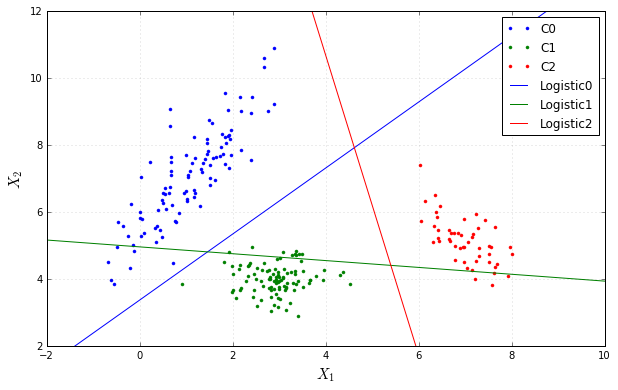

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(X1[:,0], X1[:,1], '.', label='C0')
plt.plot(X2[:,0], X2[:,1], '.', label='C1')
plt.plot(X3[:,0], X3[:,1], '.', label='C2')
plt.xlabel('$X_1$', fontsize=15)
plt.ylabel('$X_2$', fontsize=15)
plt.grid(alpha=0.3)
plt.axis([-2, 10, 2, 12])
color=['b', 'g', 'r']
for i, (xp, yp, c) in enumerate(zip(xps, yps, color)):
    plt.plot(xp, yp, color=c, label='Logistic%s'%(i))
plt.legend()
plt.show()

(2) Plot linear classification surfaces and classes that each data belongs to

In [37]:
C0 = np.exp(X*ws[0])/(1+np.exp(X*ws[0]))
C1 = np.exp(X*ws[1])/(1+np.exp(X*ws[1]))
C2 = np.exp(X*ws[2])/(1+np.exp(X*ws[2]))

y=[]
for c0, c1, c2 in zip(C0, C1, C2):
    mx = max(c0, c1, c2)
    if mx==c0:
        y.append(0)
    elif mx==c1:
        y.append(1)
    elif mx==c2:
        y.append(2)
y=np.matrix(y)

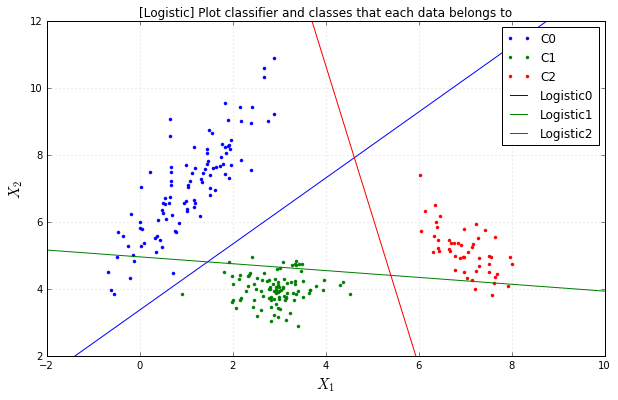

In [38]:
plt.figure(figsize=(10, 6))
b0 = np.where(y==0)
b1 = np.where(y==1)
b2 = np.where(y==2)

plt.title('[Logistic] Plot classifier and classes that each data belongs to')
plt.plot(X[b0[1],1], X[b0[1],2], '.', color='b', label='C0')
plt.plot(X[b1[1],1], X[b1[1],2], '.', color='g', label='C1')
plt.plot(X[b2[1],1], X[b2[1],2], '.', color='r', label='C2')
plt.xlabel('$X_1$', fontsize=15)
plt.ylabel('$X_2$', fontsize=15)
plt.grid(alpha=0.3)
plt.axis([-2, 10, 2, 12])
color=['b', 'g', 'r']
for i, (xp, yp, c) in enumerate(zip(xps, yps, color)):
    plt.plot(xp, yp, color=c, label='Logistic%s'%(i))
plt.legend()
plt.show()